## NeLLoC (Interleaved ANS)

We show the compression rate (BPD) and decompression speed (seconds) for SVHN and CIFAR dataset.

All the results are tested on a single CPU (MacBook Air 2020).

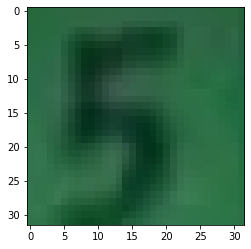

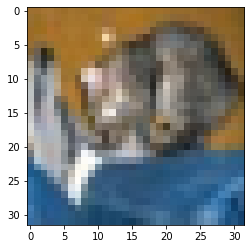

In [1]:
import time
import torch
from model import *
import matplotlib.pyplot as plt
import torchvision
from ians_coder import *
import numpy as np
from tqdm import tqdm
from scipy.io import loadmat
%matplotlib inline 
device=torch.device("cpu")

test_svhn=loadmat('../data/svhn/test_32x32.mat')['X']
svhn_img=torch.tensor(test_svhn[:,:,:,0:10]).permute(3,2,0,1)
plt.imshow(svhn_img[0].permute(1,2,0))
plt.show()
test_data=torchvision.datasets.CIFAR10('../data/', train=False, download=False)
cifar_img=torch.tensor(test_data.data[:10,:,:,:]).permute(0,3,1,2)
plt.imshow(cifar_img[0].permute(1,2,0))
plt.show()

def get_param_size(model):
    total_params=sum(p.numel() for p in model.parameters())
    return total_params*4/(1024**2)

In [2]:
def test(all_img,p_prec,k=7):
    batch_size=10
    img=all_img[0:batch_size]
    start = time.time()
    s,t_stack=cpu_ans_compression(net,img,32,32,k,p_prec=14)
    end = time.time()
    compression_time=end - start

    BPD=get_length(s,t_stack)/batch_size

    start = time.time()
    decode_img=cpu_ans_decompression(net,s,t_stack,batch_size,32,32,k,p_prec=14)
    end = time.time()
    decompression_time=end - start
    
    if (img-decode_img).sum().item()>0.:
        print('wrong')

    print('average compression time', compression_time/batch_size)
    print('average decompression time',decompression_time/batch_size)
    print('average BPD', BPD)

### 0 ResNet Block

In [3]:
net = LocalPixelCNN(res_num=0, in_kernel = 7, in_channels=3, channels=256, out_channels=100).to(device)
net.load_state_dict(torch.load('./model_save/rs0_cifar_h3.pt',map_location=device))
print('parameter size:',get_param_size(net),'mb')
test(svhn_img,16)
test(cifar_img,16)

parameter size: 0.4925689697265625 mb
average compression time 0.32446258068084716
average decompression time 0.32980101108551024
average BPD 2.12236328125
average compression time 0.327112078666687
average decompression time 0.3421110868453979
average BPD 3.591796875


### 1 ResNet Block

In [4]:
net = LocalPixelCNN(res_num=1, in_kernel = 7, in_channels=3, channels=256, out_channels=100).to(device)
net.load_state_dict(torch.load('./model_save/rs1_cifar_h3.pt',map_location=device))
print('parameter size:',get_param_size(net),'mb')
test(svhn_img,16)
test(cifar_img,16)

parameter size: 1.2454986572265625 mb
average compression time 0.45639231204986574
average decompression time 0.4869595766067505
average BPD 2.0531575520833334
average compression time 0.46939380168914796
average decompression time 0.4974253177642822
average BPD 3.486328125


### 3 ResNet Blocks


In [5]:
net = LocalPixelCNN(res_num=3, in_kernel = 7, in_channels=3, channels=256, out_channels=100).to(device)
net.load_state_dict(torch.load('./model_save/rs3_cifar_h3.pt',map_location=device))
print('parameter size:',get_param_size(net),'mb')
test(svhn_img,16)
test(cifar_img,16)

parameter size: 2.7513580322265625 mb
average compression time 0.747858190536499
average decompression time 0.770520806312561
average BPD 2.0293294270833333
average compression time 0.7552052974700928
average decompression time 0.7918538808822632
average BPD 3.4428059895833334
